<ipython-input-4-4143224377>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=years, y=india_population, palette='viridis')


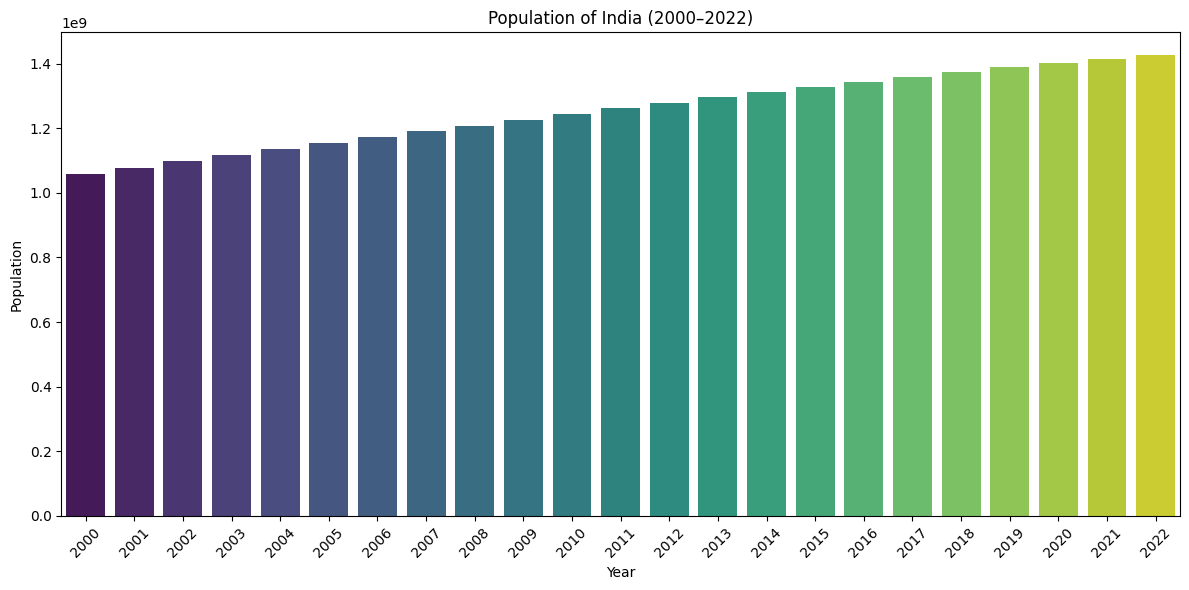

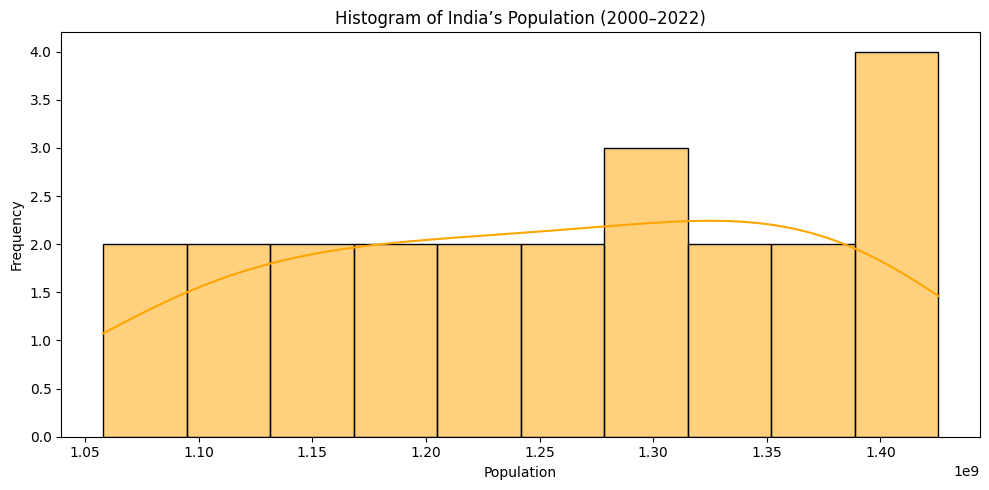

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile, io, requests, os

url = 'https://api.worldbank.org/v2/en/indicator/SP.POP.TOTL?downloadformat=csv'
response = requests.get(url)
with zipfile.ZipFile(io.BytesIO(response.content)) as z:
    z.extractall("worldbank_data")

for file in os.listdir("worldbank_data"):
    if file.endswith(".csv") and file.startswith("API_SP.POP.TOTL"):
        filename = file
        break

df = pd.read_csv(f"worldbank_data/{filename}", skiprows=4)
india_data = df[df['Country Name'] == 'India']
years = [str(year) for year in range(2000, 2023)]
india_population = india_data[years].values.flatten()

plt.figure(figsize=(12,6))
sns.barplot(x=years, y=india_population, palette='viridis')
plt.xticks(rotation=45)
plt.title('Population of India (2000–2022)')
plt.xlabel('Year')
plt.ylabel('Population')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,5))
sns.histplot(india_population, bins=10, kde=True, color='orange')
plt.title('Histogram of India’s Population (2000–2022)')
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()
